In [1]:
#Importing relevant libraries
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup

In [2]:
#Setting up the URL structure for data collection
base_url = 'https://understat.com/league/'
leagues = ['La_liga', 'EPL', 'Bundesliga', 'Serie_A', 'Ligue_1']
year = ['2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']

In [3]:
#Data for FC Barcelona, La Liga
url = base_url+leagues[0]+'/'+year[1]
fetched = requests.get(url).text

soup = BeautifulSoup(fetched, 'html.parser')

#The relevant data is in JSON format under a 'script' tag
scripts = soup.find_all('script')

In [4]:
type(scripts[0])

bs4.element.Tag

In [5]:
#Converting bs4.element.Tag to strings. 
scripts_str = []
for item in scripts:
    item = str(item)
    scripts_str.append(item)

In [6]:
#TEST
print(scripts_str[0])
if 'THEME' in scripts_str[0]:
    print('Yes')
else:
    print('No')

<script>
			var THEME = localStorage.getItem("theme") || 'DARK';
			document.body.className = "theme-" + THEME.toLowerCase();
		</script>
Yes


In [7]:
#Extracting string containing teamsData
res_str = ''
for script in scripts_str:
    if 'teamsData' in script:
        res_str = script
print (res_str)

<script>
	var teamsData = JSON.parse('\x7B\x22137\x22\x3A\x7B\x22id\x22\x3A\x22137\x22,\x22title\x22\x3A\x22Malaga\x22,\x22history\x22\x3A\x5B\x7B\x22h_a\x22\x3A\x22h\x22,\x22xG\x22\x3A0.982720000000000037942982089589349925518035888671875,\x22xGA\x22\x3A0.856600999999999945799800116219557821750640869140625,\x22npxG\x22\x3A0.982720000000000037942982089589349925518035888671875,\x22npxGA\x22\x3A0.856600999999999945799800116219557821750640869140625,\x22ppda\x22\x3A\x7B\x22att\x22\x3A146,\x22def\x22\x3A31\x7D,\x22ppda_allowed\x22\x3A\x7B\x22att\x22\x3A179,\x22def\x22\x3A20\x7D,\x22deep\x22\x3A6,\x22deep_allowed\x22\x3A3,\x22scored\x22\x3A0,\x22missed\x22\x3A0,\x22xpts\x22\x3A1.4269000000000000571986902286880649626255035400390625,\x22result\x22\x3A\x22d\x22,\x22date\x22\x3A\x222015\x2D08\x2D21\x2022\x3A30\x3A00\x22,\x22wins\x22\x3A0,\x22draws\x22\x3A1,\x22loses\x22\x3A0,\x22pts\x22\x3A1,\x22npxGD\x22\x3A0.12611900000000009214318197336979210376739501953125\x7D,\x7B\x22h_a\x22\x3A\x22a\x22,\x2

In [8]:
#Extracting JSON data
import json

extracted_string = ''

#Searching for 'teamsData' in scripts.
#Extracting string containing JSON data
for item in scripts_str:
    if 'teamsData' in item:
        extracted_string = item.strip()

#print(extracted_string)

#Strip unnecessary symbols to get json data
index_start = extracted_string.index("('")+2
index_end = extracted_string.index("')")

json_data = extracted_string[index_start:index_end]
json_data = json_data.encode('utf8').decode('unicode_escape')

data = json.loads(json_data)

In [9]:
data

{'137': {'id': '137',
  'title': 'Malaga',
  'history': [{'h_a': 'h',
    'xG': 0.98272,
    'xGA': 0.856601,
    'npxG': 0.98272,
    'npxGA': 0.856601,
    'ppda': {'att': 146, 'def': 31},
    'ppda_allowed': {'att': 179, 'def': 20},
    'deep': 6,
    'deep_allowed': 3,
    'scored': 0,
    'missed': 0,
    'xpts': 1.4269,
    'result': 'd',
    'date': '2015-08-21 22:30:00',
    'wins': 0,
    'draws': 1,
    'loses': 0,
    'pts': 1,
    'npxGD': 0.1261190000000001},
   {'h_a': 'a',
    'xG': 0.223011,
    'xGA': 1.92171,
    'npxG': 0.223011,
    'npxGA': 1.92171,
    'ppda': {'att': 274, 'def': 29},
    'ppda_allowed': {'att': 90, 'def': 18},
    'deep': 3,
    'deep_allowed': 20,
    'scored': 0,
    'missed': 1,
    'xpts': 0.2264,
    'result': 'l',
    'date': '2015-08-29 22:30:00',
    'wins': 0,
    'draws': 0,
    'loses': 1,
    'pts': 0,
    'npxGD': -1.698699},
   {'h_a': 'h',
    'xG': 1.03596,
    'xGA': 0.885807,
    'npxG': 1.03596,
    'npxGA': 0.885807,
    'ppda

In [10]:
data.keys()

dict_keys(['137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '151', '152', '153', '154', '155', '156'])

In [11]:
#Extracting team names from team ids

teams = {}
for id in data.keys():
    teams[id] = data[id]['title']

In [12]:
teams

{'137': 'Malaga',
 '138': 'Sevilla',
 '139': 'Deportivo La Coruna',
 '140': 'Real Sociedad',
 '141': 'Espanyol',
 '142': 'Getafe',
 '143': 'Atletico Madrid',
 '144': 'Las Palmas',
 '145': 'Rayo Vallecano',
 '146': 'Valencia',
 '147': 'Athletic Club',
 '148': 'Barcelona',
 '149': 'Sporting Gijon',
 '150': 'Real Madrid',
 '151': 'Levante',
 '152': 'Celta Vigo',
 '153': 'Real Betis',
 '154': 'Villarreal',
 '155': 'Granada',
 '156': 'Eibar'}

In [13]:
#Extracting metrics, stored as an array of dictionaries under the 'history' key
#TEST
columns = []
values = []

for id in data.keys():
    print(id)
    columns = list(data[id]['history'][0].keys())
    values = list(data[id]['history'][0].values())
    break

137


In [14]:
data['137']['history'][0].values()

dict_values(['h', 0.98272, 0.856601, 0.98272, 0.856601, {'att': 146, 'def': 31}, {'att': 179, 'def': 20}, 6, 3, 0, 0, 1.4269, 'd', '2015-08-21 22:30:00', 0, 1, 0, 1, 0.1261190000000001])

In [15]:
columns

['h_a',
 'xG',
 'xGA',
 'npxG',
 'npxGA',
 'ppda',
 'ppda_allowed',
 'deep',
 'deep_allowed',
 'scored',
 'missed',
 'xpts',
 'result',
 'date',
 'wins',
 'draws',
 'loses',
 'pts',
 'npxGD']

In [16]:
values

['h',
 0.98272,
 0.856601,
 0.98272,
 0.856601,
 {'att': 146, 'def': 31},
 {'att': 179, 'def': 20},
 6,
 3,
 0,
 0,
 1.4269,
 'd',
 '2015-08-21 22:30:00',
 0,
 1,
 0,
 1,
 0.1261190000000001]

In [17]:
data['148']['history'][0]

{'h_a': 'a',
 'xG': 1.76141,
 'xGA': 0.394999,
 'npxG': 1.01813,
 'npxGA': 0.394999,
 'ppda': {'att': 126, 'def': 19},
 'ppda_allowed': {'att': 446, 'def': 27},
 'deep': 5,
 'deep_allowed': 5,
 'scored': 1,
 'missed': 0,
 'xpts': 2.5392,
 'result': 'w',
 'date': '2015-08-23 20:30:00',
 'wins': 1,
 'draws': 0,
 'loses': 0,
 'pts': 3,
 'npxGD': 0.623131}

In [18]:
#Each row is a dictionary
barca_data = []
for row in data['148']['history']:
    barca_data.append(list(row.values()))

df = pd.DataFrame(barca_data, columns = columns)

In [19]:
df.head(5)

,h_a,xG,xGA,npxG,npxGA,ppda,ppda_allowed,deep,deep_allowed,scored,missed,xpts,result,date,wins,draws,loses,pts,npxGD
0,a,1.76141,0.394999,1.01813,0.394999,"{'att': 126, 'def': 19}","{'att': 446, 'def': 27}",5,5,1,0,2.5392,w,2015-08-23 20:30:00,1,0,0,3,0.623131
1,h,1.92171,0.223011,1.92171,0.223011,"{'att': 90, 'def': 18}","{'att': 274, 'def': 29}",20,3,1,0,2.6354,w,2015-08-29 22:30:00,1,0,0,3,1.698699
2,a,2.33036,0.833737,2.33036,0.833737,"{'att': 162, 'def': 16}","{'att': 378, 'def': 28}",9,2,2,1,2.4192,w,2015-09-12 22:30:00,1,0,0,3,1.496623
3,h,4.01220,0.866439,2.52590,0.866439,"{'att': 154, 'def': 32}","{'att': 316, 'def': 17}",13,2,4,1,2.8854,w,2015-09-20 22:30:00,1,0,0,3,1.659461
4,a,2.51546,2.225770,2.51546,2.225770,"{'att': 187, 'def': 24}","{'att': 257, 'def': 35}",16,11,1,4,1.5861,l,2015-09-23 22:00:00,0,0,1,0,0.289690


In [20]:
dataframes = {}
for id, team in teams.items():
    teams_data = []
    
    #Extract data for single team
    for row in data[id]['history']:
        teams_data.append(list(row.values()))
    
    #Loop into dataframes dictionary for each team
    #It is a dictionary of dataframes
    df = pd.DataFrame(teams_data, columns=columns)
    dataframes[team] = df
    print(f'{team} data added')

Malaga data added
Sevilla data added
Deportivo La Coruna data added
Real Sociedad data added
Espanyol data added
Getafe data added
Atletico Madrid data added
Las Palmas data added
Rayo Vallecano data added
Valencia data added
Athletic Club data added
Barcelona data added
Sporting Gijon data added
Real Madrid data added
Levante data added
Celta Vigo data added
Real Betis data added
Villarreal data added
Granada data added
Eibar data added


In [21]:
dataframes['Barcelona']

,h_a,xG,xGA,npxG,npxGA,ppda,ppda_allowed,deep,deep_allowed,scored,missed,xpts,result,date,wins,draws,loses,pts,npxGD
0,a,1.761410,0.394999,1.018130,0.394999,"{'att': 126, 'def': 19}","{'att': 446, 'def': 27}",5,5,1,0,2.5392,w,2015-08-23 20:30:00,1,0,0,3,0.623131
1,h,1.921710,0.223011,1.921710,0.223011,"{'att': 90, 'def': 18}","{'att': 274, 'def': 29}",20,3,1,0,2.6354,w,2015-08-29 22:30:00,1,0,0,3,1.698699
2,a,2.330360,0.833737,2.330360,0.833737,"{'att': 162, 'def': 16}","{'att': 378, 'def': 28}",9,2,2,1,2.4192,w,2015-09-12 22:30:00,1,0,0,3,1.496623
3,h,4.012200,0.866439,2.525900,0.866439,"{'att': 154, 'def': 32}","{'att': 316, 'def': 17}",13,2,4,1,2.8854,w,2015-09-20 22:30:00,1,0,0,3,1.659461
4,a,2.515460,2.225770,2.515460,2.225770,"{'att': 187, 'def': 24}","{'att': 257, 'def': 35}",16,11,1,4,1.5861,l,2015-09-23 22:00:00,0,0,1,0,0.289690
5,h,3.479920,0.585814,2.736650,0.585814,"{'att': 140, 'def': 34}","{'att': 387, 'def': 31}",12,6,2,1,2.8555,w,2015-09-26 18:00:00,1,0,0,3,2.150836
6,a,3.869970,1.577050,3.126690,1.577050,"{'att': 136, 'def': 24}","{'att': 252, 'def': 27}",20,8,1,2,2.6118,l,2015-10-03 18:00:00,0,0,1,0,1.549640
7,h,4.615430,2.836370,3.129000,2.836370,"{'att': 292, 'def': 29}","{'att': 261, 'def': 31}",3,9,5,2,2.3605,w,2015-10-17 22:30:00,1,0,0,3,0.292630
8,h,1.646620,1.301320,1.646620,1.301320,"{'att': 95, 'def': 23}","{'att': 352, 'def': 26}",10,3,3,1,1.6099,w,2015-10-25 21:15:00,1,0,0,3,0.345300
9,a,2.078640,0.189920,2.078640,0.189920,"{'att': 168, 'def': 32}","{'att': 389, 'def': 17}",18,1,2,0,2.7679,w,2015-10-31 23:30:00,1,0,0,3,1.888720


In [22]:
#Fixing ppda and ppda_allowed data to appropriate formats
#by applying formula through lambda functions

for team, df in dataframes.items():
    dataframes[team]['ppda_team'] = dataframes[team]['ppda'].apply(lambda x: x['att']/x['def'] if x['def']!=0 else 0)
    dataframes[team]['ppda_opponent'] = dataframes[team]['ppda_allowed'].apply(lambda x: x['att']/x['def'] if x['def']!=0 else 0)

#Testing by checking for FC Barcelona
dataframes['Barcelona'].head(3)

,h_a,xG,xGA,npxG,npxGA,ppda,ppda_allowed,deep,deep_allowed,scored,...,xpts,result,date,wins,draws,loses,pts,npxGD,ppda_team,ppda_opponent
0,a,1.76141,0.394999,1.01813,0.394999,"{'att': 126, 'def': 19}","{'att': 446, 'def': 27}",5,5,1,...,2.5392,w,2015-08-23 20:30:00,1,0,0,3,0.623131,6.631579,16.518519
1,h,1.92171,0.223011,1.92171,0.223011,"{'att': 90, 'def': 18}","{'att': 274, 'def': 29}",20,3,1,...,2.6354,w,2015-08-29 22:30:00,1,0,0,3,1.698699,5.000000,9.448276
2,a,2.33036,0.833737,2.33036,0.833737,"{'att': 162, 'def': 16}","{'att': 378, 'def': 28}",9,2,2,...,2.4192,w,2015-09-12 22:30:00,1,0,0,3,1.496623,10.125000,13.500000


In [23]:
dataframes.keys()

dict_keys(['Malaga', 'Sevilla', 'Deportivo La Coruna', 'Real Sociedad', 'Espanyol', 'Getafe', 'Atletico Madrid', 'Las Palmas', 'Rayo Vallecano', 'Valencia', 'Athletic Club', 'Barcelona', 'Sporting Gijon', 'Real Madrid', 'Levante', 'Celta Vigo', 'Real Betis', 'Villarreal', 'Granada', 'Eibar'])

In [24]:
#Obtaining total aggregations of these dataframes for every game
#Every metric is summed up, except ppda and ppda_allowed which are averaged

In [25]:
columns

['h_a',
 'xG',
 'xGA',
 'npxG',
 'npxGA',
 'ppda',
 'ppda_allowed',
 'deep',
 'deep_allowed',
 'scored',
 'missed',
 'xpts',
 'result',
 'date',
 'wins',
 'draws',
 'loses',
 'pts',
 'npxGD']

In [26]:
sum_cols = ['xG', 'xGA', 'npxG', 'npxGA', 'deep', 'deep_allowed', 'scored', 'missed', 'xpts', 'wins', 'draws', 'loses', 'pts', 'npxGD']
mean_cols = ['ppda_team', 'ppda_opponent']

In [27]:
#Returning frames with relevant aggregations performed

agg_frames = []
for team, df in dataframes.items():
    sum_data = pd.DataFrame(df[sum_cols].sum()).transpose()
    mean_data = pd.DataFrame(df[mean_cols].mean()).transpose()
    final_df = sum_data.join(mean_data)
    final_df['team'] = team
    final_df['matches'] = len(df)
    #Storing each dataframe in a list
    agg_frames.append(final_df)

#Concatenating dataframes from list
full_stat = pd.concat(agg_frames)
full_stat

,xG,xGA,npxG,npxGA,deep,deep_allowed,scored,missed,xpts,wins,draws,loses,pts,npxGD,ppda_team,ppda_opponent,team,matches
0,45.751884,45.254606,42.778771,43.768180,196.0,191.0,38.0,35.0,53.0801,12.0,12.0,14.0,48.0,-0.989409,7.830133,7.261827,Malaga,38
0,62.970634,46.088286,57.767830,43.858446,296.0,216.0,51.0,50.0,63.6363,14.0,10.0,14.0,52.0,13.909384,8.600500,8.957718,Sevilla,38
0,43.747087,52.374037,43.003814,49.400919,166.0,240.0,45.0,61.0,46.0791,8.0,18.0,12.0,42.0,-6.397105,11.324321,8.739138,Deportivo La Coruna,38
0,47.947144,48.036505,47.203864,42.822658,185.0,183.0,45.0,48.0,52.7503,13.0,9.0,16.0,48.0,4.381206,8.157427,9.268505,Real Sociedad,38
0,46.091860,60.842278,43.862022,56.382991,186.0,219.0,40.0,74.0,43.1508,12.0,7.0,19.0,43.0,-12.520969,8.504200,7.508597,Espanyol,38
0,41.773186,63.348645,40.286629,55.775808,159.0,229.0,37.0,67.0,40.8790,9.0,9.0,20.0,36.0,-15.489179,9.866715,7.230707,Getafe,38
0,54.927365,27.797052,53.440935,27.053774,261.0,170.0,63.0,18.0,72.2803,28.0,4.0,6.0,88.0,26.387161,8.834884,9.045124,Atletico Madrid,38
0,38.676393,59.236815,34.949103,56.263722,228.0,250.0,45.0,53.0,41.1793,12.0,8.0,18.0,44.0,-21.314619,10.079552,8.927858,Las Palmas,38
0,52.259441,65.088957,49.889666,58.399829,157.0,240.0,52.0,73.0,45.7753,9.0,11.0,18.0,38.0,-8.510163,6.963566,9.270395,Rayo Vallecano,38
0,50.508099,61.685717,46.636375,58.586166,203.0,250.0,46.0,48.0,46.7251,11.0,11.0,16.0,44.0,-11.949791,9.061172,7.278319,Valencia,38


In [28]:
#Reorder columns for better readability, sort rows based on points, reset index and add column 'position'
full_stat = full_stat[['team', 'matches', 'wins', 'draws', 'loses', 'scored', 'missed', 'pts', 'xG', 'npxG', 'xGA', 'npxGA', 'npxGD', 'ppda_team', 'ppda_opponent', 'deep', 'deep_allowed', 'xpts']]
full_stat.sort_values('pts', ascending=False, inplace=True)
full_stat.reset_index(inplace=True, drop=True)
full_stat['position'] = range(1,len(full_stat)+1)
full_stat

,team,matches,wins,draws,loses,scored,missed,pts,xG,npxG,xGA,npxGA,npxGD,ppda_team,ppda_opponent,deep,deep_allowed,xpts,position
0,Barcelona,38,29.0,4.0,5.0,112.0,29.0,91.0,113.598270,99.477020,34.029090,33.285940,66.191080,6.012152,15.064390,570.0,163.0,94.3800,1
1,Real Madrid,38,28.0,6.0,4.0,110.0,34.0,90.0,90.454148,83.764638,45.233782,42.260671,41.503967,9.251967,14.571881,404.0,211.0,79.0927,2
2,Atletico Madrid,38,28.0,4.0,6.0,63.0,18.0,88.0,54.927365,53.440935,27.797052,27.053774,26.387161,8.834884,9.045124,261.0,170.0,72.2803,3
3,Villarreal,38,18.0,10.0,10.0,44.0,35.0,64.0,40.488814,38.258973,41.630788,39.400958,-1.141985,9.924386,9.034772,188.0,215.0,52.1071,4
4,Athletic Club,38,18.0,8.0,12.0,58.0,45.0,62.0,53.896614,50.039775,45.326224,40.123397,9.916378,8.112320,9.674713,221.0,174.0,58.2381,5
5,Celta Vigo,38,17.0,9.0,12.0,51.0,59.0,60.0,50.203470,46.487210,51.981726,48.265455,-1.778245,6.435315,11.222888,321.0,245.0,53.0810,6
6,Sevilla,38,14.0,10.0,14.0,51.0,50.0,52.0,62.970634,57.767830,46.088286,43.858446,13.909384,8.600500,8.957718,296.0,216.0,63.6363,7
7,Malaga,38,12.0,12.0,14.0,38.0,35.0,48.0,45.751884,42.778771,45.254606,43.768180,-0.989409,7.830133,7.261827,196.0,191.0,53.0801,8
8,Real Sociedad,38,13.0,9.0,16.0,45.0,48.0,48.0,47.947144,47.203864,48.036505,42.822658,4.381206,8.157427,9.268505,185.0,183.0,52.7503,9
9,Real Betis,38,11.0,12.0,15.0,34.0,52.0,45.0,40.112455,37.139351,64.394609,63.651329,-26.511978,11.124884,6.627317,152.0,283.0,40.4880,10


In [29]:
#Adding columns indicating difference between expected and actual metrics
full_stat['xG_diff'] = full_stat['xG'] - full_stat['scored']
full_stat['xGA_diff'] = full_stat['xGA'] - full_stat['missed']
full_stat['xpts_diff'] = full_stat['xpts'] - full_stat['pts']

In [30]:
#Converting floats to integer where appropriate
cols_to_int = ['wins', 'draws', 'loses', 'scored', 'missed', 'pts', 'deep', 'deep_allowed']
full_stat[cols_to_int] = full_stat[cols_to_int].astype(int)

In [31]:
col_order = ['position','team', 'matches', 'wins', 'draws', 'loses', 'scored', 'missed', 'pts', 'xG', 'xG_diff', 'npxG', 'xGA', 'xGA_diff', 'npxGA', 'npxGD', 'ppda_team', 'ppda_opponent', 'deep', 'deep_allowed', 'xpts', 'xpts_diff']
full_stat = full_stat[col_order]
pd.options.display.float_format = '{:,.2f}'.format
full_stat.head(10)

,position,team,matches,wins,draws,loses,scored,missed,pts,xG,...,xGA,xGA_diff,npxGA,npxGD,ppda_team,ppda_opponent,deep,deep_allowed,xpts,xpts_diff
0,1,Barcelona,38,29,4,5,112,29,91,113.60,...,34.03,5.03,33.29,66.19,6.01,15.06,570,163,94.38,3.38
1,2,Real Madrid,38,28,6,4,110,34,90,90.45,...,45.23,11.23,42.26,41.50,9.25,14.57,404,211,79.09,-10.91
2,3,Atletico Madrid,38,28,4,6,63,18,88,54.93,...,27.80,9.80,27.05,26.39,8.83,9.05,261,170,72.28,-15.72
3,4,Villarreal,38,18,10,10,44,35,64,40.49,...,41.63,6.63,39.40,-1.14,9.92,9.03,188,215,52.11,-11.89
4,5,Athletic Club,38,18,8,12,58,45,62,53.90,...,45.33,0.33,40.12,9.92,8.11,9.67,221,174,58.24,-3.76
5,6,Celta Vigo,38,17,9,12,51,59,60,50.20,...,51.98,-7.02,48.27,-1.78,6.44,11.22,321,245,53.08,-6.92
6,7,Sevilla,38,14,10,14,51,50,52,62.97,...,46.09,-3.91,43.86,13.91,8.60,8.96,296,216,63.64,11.64
7,8,Malaga,38,12,12,14,38,35,48,45.75,...,45.25,10.25,43.77,-0.99,7.83,7.26,196,191,53.08,5.08
8,9,Real Sociedad,38,13,9,16,45,48,48,47.95,...,48.04,0.04,42.82,4.38,8.16,9.27,185,183,52.75,4.75
9,10,Real Betis,38,11,12,15,34,52,45,40.11,...,64.39,12.39,63.65,-26.51,11.12,6.63,152,283,40.49,-4.51


In [32]:
#TEST 
season_data = {}
season_data[year[1]] = full_stat
print(season_data)
full_data = {}
full_data[leagues[0]] = season_data
print(full_data)

{'2015':     position                 team  matches  wins  draws  loses  scored  \
0          1            Barcelona       38    29      4      5     112   
1          2          Real Madrid       38    28      6      4     110   
2          3      Atletico Madrid       38    28      4      6      63   
3          4           Villarreal       38    18     10     10      44   
4          5        Athletic Club       38    18      8     12      58   
5          6           Celta Vigo       38    17      9     12      51   
6          7              Sevilla       38    14     10     14      51   
7          8               Malaga       38    12     12     14      38   
8          9        Real Sociedad       38    13      9     16      45   
9         10           Real Betis       38    11     12     15      34   
10        11             Valencia       38    11     11     16      46   
11        12           Las Palmas       38    12      8     18      45   
12        13             Espa

In [33]:
#COMPLETE CODE

#Importing relevant libraries
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup

#Setting up the URL structure for data collection
base_url = 'https://understat.com/league/'
leagues = ['La_liga', 'EPL', 'Bundesliga', 'Serie_A', 'Ligue_1']
year = ['2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']

full_data = {}
for league in leagues:
    season_data= {}
    for season in year: 
        url = base_url+league+'/'+season
        fetched = requests.get(url).text
        soup = BeautifulSoup(fetched, 'html.parser')

        #The relevant data is in JSON format under a 'script' tag of type bs4.element.Tag
        scripts = soup.find_all('script')
        
        #Converting scripts from bs4.element.Tag to strings. 
        scripts_str = []
        for item in scripts:
            item = str(item)
            scripts_str.append(item)
            
        #Extracting JSON data
        import json

        extracted_string = ''

        #Searching for 'teamsData' in scripts, which is where relevant information is stored.
        #Extracting string containing JSON data
        for item in scripts_str:
            if 'teamsData' in item:
                extracted_string = item.strip()

        #print(extracted_string)

        #Strip unnecessary symbols to get json data
        index_start = extracted_string.index("('")+2
        index_end = extracted_string.index("')")

        json_data = extracted_string[index_start:index_end]
        json_data = json_data.encode('utf8').decode('unicode_escape')

        #Convert JSON data to Python dictionary
        data = json.loads(json_data)
        
        #Extracting team names from team ids
        teams = {}
        for id in data.keys():
            teams[id] = data[id]['title']
            
        #Defining database columns
        columns = []
        columns = list(data[id]['history'][0].keys())
        
        #Extracting data for each team
        dataframes = {}
        for id, team in teams.items():
            teams_data = []

            for row in data[id]['history']:
                teams_data.append(list(row.values()))

            #Loop into dataframes dictionary for each team
            #Dictionary of dataframes
            df = pd.DataFrame(teams_data, columns=columns)
            dataframes[team] = df
            #print(f'{team} data added')
            
            #Fixing ppda and ppda_allowed data to appropriate formats
            #by applying formula through lambda functions
        for team, df in dataframes.items():
            dataframes[team]['ppda_team'] = dataframes[team]['ppda'].apply(lambda x: x['att']/x['def'] if x['def']!=0 else 0)
            dataframes[team]['ppda_opponent'] = dataframes[team]['ppda_allowed'].apply(lambda x: x['att']/x['def'] if x['def']!=0 else 0)

        #Obtaining total aggregations of these dataframes for every game
        #Every metric is summed up, except ppda and ppda_allowed which are averaged
        sum_cols = ['xG', 'xGA', 'npxG', 'npxGA', 'deep', 'deep_allowed', 'scored', 'missed', 'xpts', 'wins', 'draws', 'loses', 'pts', 'npxGD']
        mean_cols = ['ppda_team', 'ppda_opponent']
        
        #Returning frames with relevant aggregations performed
        agg_frames = []
        for team, df in dataframes.items():
            sum_data = pd.DataFrame(df[sum_cols].sum()).transpose()
            mean_data = pd.DataFrame(df[mean_cols].mean()).transpose()
            final_df = sum_data.join(mean_data)
            final_df['team'] = team
            final_df['matches'] = len(df)
            #Storing each dataframe in a list
            agg_frames.append(final_df)

        #Concatenating dataframes from list
        full_stat = pd.concat(agg_frames)
        
        #Reorder columns for better readability, sort rows based on points, reset index and add column 'position'
        full_stat = full_stat[['team', 'matches', 'wins', 'draws', 'loses', 'scored', 'missed', 'pts', 'xG', 'npxG', 'xGA', 'npxGA', 'npxGD', 'ppda_team', 'ppda_opponent', 'deep', 'deep_allowed', 'xpts']]
        full_stat.sort_values('pts', ascending=False, inplace=True)
        full_stat.reset_index(inplace=True, drop=True)
        full_stat['position'] = range(1,len(full_stat)+1)
        
        #Adding columns indicating difference between expected and actual metrics
        full_stat['xG_diff'] = full_stat['xG'] - full_stat['scored']
        full_stat['xGA_diff'] = full_stat['xGA'] - full_stat['missed']
        full_stat['xpts_diff'] = full_stat['xpts'] - full_stat['pts']
        
        #Converting floats to integer where appropriate
        cols_to_int = ['wins', 'draws', 'loses', 'scored', 'missed', 'pts', 'deep', 'deep_allowed']
        full_stat[cols_to_int] = full_stat[cols_to_int].astype(int)
        
        #Visual formatting for clean output
        col_order = ['position','team', 'matches', 'wins', 'draws', 'loses', 'scored', 'missed', 'pts', 'xG', 'xG_diff', 'npxG', 'xGA', 'xGA_diff', 'npxGA', 'npxGD', 'ppda_team', 'ppda_opponent', 'deep', 'deep_allowed', 'xpts', 'xpts_diff']
        full_stat = full_stat[col_order]
        full_stat = full_stat.set_index('position')
        pd.options.display.float_format = '{:,.2f}'.format
        #full_stat.head(10)
        
        #Looping and storing season data in a dataframe
        season_data[season] = full_stat
    
    #Concatenating all seasons data for each team
    season_df = pd.concat(season_data)
    #Storing in another dataframe for each league
    full_data[league] = season_df

#Concatenating all leagues data into final dataframe
data = pd.concat(full_data)
data.head()

team  matches  wins  draws  loses  scored  \
             position                                                         
La_liga 2014 1               Barcelona       38    30      4      4     110   
             2             Real Madrid       38    30      2      6     118   
             3         Atletico Madrid       38    23      9      6      67   
             4                Valencia       38    22     11      5      70   
             5                 Sevilla       38    23      7      8      71   

                       missed  pts     xG  xG_diff  ...   xGA  xGA_diff  \
             position                               ...                   
La_liga 2014 1             21   94 102.98    -7.02  ... 28.44      7.44   
             2             38   92  95.77   -22.23  ... 42.61      4.61   
             3             29   78  57.05    -9.95  ... 29.07      0.07   
             4             32   77  55.06   -14.94  ... 39.39      7.39   
             5             45   76  69.53    -1.47  ... 47.86      2.86   

                       npxGA  npxGD  ppda_team  ppda_opponent  deep  \
             position                                                 
La_liga 2014 1         24.73  73.05       5.68          16.37   489   
             2         38.89  47.21      10.21          12.93   351   
             3         26.84  25.75       8.98           9.24   197   
             4         33.45  16.26       8.71           7.87   203   
             5         41.92  20.18       8.28           9.48   305   

                       deep_allowed  xpts  xpts_diff  
             position                                 
La_liga 2014 1                  114 94.08       0.08  
             2                  153 81.75     -10.25  
             3                  123 73.14      -4.86  
             4                  172 63.71     -13.29  
             5                  168 67.39      -8.61  

[5 rows x 21 columns]

In [34]:
data_copy = data

In [35]:
data_copy = data_copy.reset_index().rename(columns={"level_0":"league", "level_1":"season"})

In [36]:
data.shape

(784, 21)

In [37]:
data_copy.groupby('league').head()

,league,season,position,team,matches,wins,draws,loses,scored,missed,...,xGA,xGA_diff,npxGA,npxGD,ppda_team,ppda_opponent,deep,deep_allowed,xpts,xpts_diff
0,La_liga,2014,1,Barcelona,38,30,4,4,110,21,...,28.44,7.44,24.73,73.05,5.68,16.37,489,114,94.08,0.08
1,La_liga,2014,2,Real Madrid,38,30,2,6,118,38,...,42.61,4.61,38.89,47.21,10.21,12.93,351,153,81.75,-10.25
2,La_liga,2014,3,Atletico Madrid,38,23,9,6,67,29,...,29.07,0.07,26.84,25.75,8.98,9.24,197,123,73.14,-4.86
3,La_liga,2014,4,Valencia,38,22,11,5,70,32,...,39.39,7.39,33.45,16.26,8.71,7.87,203,172,63.71,-13.29
4,La_liga,2014,5,Sevilla,38,23,7,8,71,45,...,47.86,2.86,41.92,20.18,8.28,9.48,305,168,67.39,-8.61
160,EPL,2014,1,Chelsea,38,26,9,3,73,32,...,31.52,-0.48,29.24,35.50,10.94,13.42,407,171,75.32,-11.68
161,EPL,2014,2,Manchester City,38,24,7,7,83,38,...,40.50,2.50,37.45,32.15,7.98,15.08,575,144,73.10,-5.90
162,EPL,2014,3,Arsenal,38,22,9,7,71,36,...,35.72,-0.28,33.44,31.04,8.66,13.25,398,171,75.17,0.17
163,EPL,2014,4,Manchester United,38,20,10,8,62,37,...,39.84,2.84,36.80,13.60,7.65,15.52,267,194,63.03,-6.97
164,EPL,2014,5,Tottenham,38,19,7,12,58,53,...,57.04,4.04,51.60,-3.17,8.00,11.30,210,232,48.94,-15.06


In [38]:
#data.to_csv('football_stats.csv')
data_copy.to_csv('football_stats_noindex.csv')

In [39]:
data_copy

,league,season,position,team,matches,wins,draws,loses,scored,missed,...,xGA,xGA_diff,npxGA,npxGD,ppda_team,ppda_opponent,deep,deep_allowed,xpts,xpts_diff
0,La_liga,2014,1,Barcelona,38,30,4,4,110,21,...,28.44,7.44,24.73,73.05,5.68,16.37,489,114,94.08,0.08
1,La_liga,2014,2,Real Madrid,38,30,2,6,118,38,...,42.61,4.61,38.89,47.21,10.21,12.93,351,153,81.75,-10.25
2,La_liga,2014,3,Atletico Madrid,38,23,9,6,67,29,...,29.07,0.07,26.84,25.75,8.98,9.24,197,123,73.14,-4.86
3,La_liga,2014,4,Valencia,38,22,11,5,70,32,...,39.39,7.39,33.45,16.26,8.71,7.87,203,172,63.71,-13.29
4,La_liga,2014,5,Sevilla,38,23,7,8,71,45,...,47.86,2.86,41.92,20.18,8.28,9.48,305,168,67.39,-8.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
779,Ligue_1,2021,16,Lorient,26,5,9,12,21,39,...,35.03,-3.97,31.23,-7.23,16.46,10.45,109,137,28.78,4.78
780,Ligue_1,2021,17,Metz,26,4,10,12,25,45,...,45.11,0.11,42.07,-22.63,16.55,10.84,55,166,18.87,-3.13
781,Ligue_1,2021,18,Bordeaux,26,4,10,12,38,63,...,48.58,-14.42,43.12,-15.01,13.17,12.02,107,177,23.59,1.59
782,Ligue_1,2021,19,Troyes,26,5,7,14,23,41,...,40.28,-0.72,34.96,-10.52,17.61,10.85,102,174,25.80,3.80


In [40]:
season_data

{'2014':                            team  matches  wins  draws  loses  scored  missed  \
 position                                                                       
 1           Paris Saint Germain       38    24     11      3      83      36   
 2                          Lyon       38    22      9      7      72      33   
 3                        Monaco       38    20     11      7      51      26   
 4                     Marseille       38    21      6     11      76      42   
 5                 Saint-Etienne       38    19     12      7      51      30   
 6                      Bordeaux       38    17     12      9      47      44   
 7                         Lille       38    16      8     14      43      42   
 8                   Montpellier       38    16      8     14      46      39   
 9                        Rennes       38    13     11     14      35      42   
 10                     Guingamp       38    15      4     19      41      55   
 11                 

In [41]:
full_data['La_liga']

team  matches  wins  draws  loses  scored  missed  \
     position                                                                 
2014 1               Barcelona       38    30      4      4     110      21   
     2             Real Madrid       38    30      2      6     118      38   
     3         Atletico Madrid       38    23      9      6      67      29   
     4                Valencia       38    22     11      5      70      32   
     5                 Sevilla       38    23      7      8      71      45   
...                        ...      ...   ...    ...    ...     ...     ...   
2021 16               Mallorca       25     6      8     11      23      39   
     17                Granada       25     5      9     11      27      40   
     18                 Alaves       26     5      6     15      21      44   
     19                  Cadiz       25     3     11     11      21      39   
     20                Levante       26     3      9     14      28      51   

               pts     xG  xG_diff  ...   xGA  xGA_diff  npxGA  npxGD  \
     position                       ...                                 
2014 1          94 102.98    -7.02  ... 28.44      7.44  24.73  73.05   
     2          92  95.77   -22.23  ... 42.61      4.61  38.89  47.21   
     3          78  57.05    -9.95  ... 29.07      0.07  26.84  25.75   
     4          77  55.06   -14.94  ... 39.39      7.39  33.45  16.26   
     5          76  69.53    -1.47  ... 47.86      2.86  41.92  20.18   
...            ...    ...      ...  ...   ...       ...    ...    ...   
2021 16         26  27.93     4.93  ... 35.32     -3.68  31.60  -7.39   
     17         24  24.91    -2.09  ... 44.41      4.41  39.95 -17.27   
     18         21  25.83     4.83  ... 40.55     -3.45  35.84 -14.47   
     19         20  22.67     1.67  ... 41.81      2.81  35.12 -16.29   
     20         18  32.70     4.70  ... 38.65    -12.35  35.67  -7.57   

               ppda_team  ppda_opponent  deep  deep_allowed  xpts  xpts_diff  
     position                                                                 
2014 1              5.68          16.37   489           114 94.08       0.08  
     2             10.21          12.93   351           153 81.75     -10.25  
     3              8.98           9.24   197           123 73.14      -4.86  
     4              8.71           7.87   203           172 63.71     -13.29  
     5              8.28           9.48   305           168 67.39      -8.61  
...                  ...            ...   ...           ...   ...        ...  
2021 16             9.61           6.90   112           162 27.98       1.98  
     17            11.36           8.97    88           190 21.97      -2.03  
     18            12.76           7.42    91           195 26.92       5.92  
     19            15.62           8.15    74           194 21.55       1.55  
     20            10.32          10.82   113           143 33.44      15.44  

[160 rows x 21 columns]

In [42]:
full_data['La_liga'].reset_index().rename(columns={'level_0':'season'}).to_csv('La_liga.csv')

In [43]:
season_df['team'].unique()

array(['Paris Saint Germain', 'Lyon', 'Monaco', 'Marseille',
       'Saint-Etienne', 'Bordeaux', 'Lille', 'Montpellier', 'Rennes',
       'Guingamp', 'Nice', 'SC Bastia', 'Caen', 'Nantes', 'Reims',
       'Lorient', 'Toulouse', 'Evian Thonon Gaillard', 'Metz', 'Lens',
       'Angers', 'GFC Ajaccio', 'Troyes', 'Dijon', 'Nancy', 'Amiens',
       'Strasbourg', 'Nimes', 'Brest', 'Clermont Foot'], dtype=object)

## EDA

In [44]:
feature_cols = ['matches',
                'wins', 'draws', 'loses', 'scored',
                'missed', 'xG', 'xG_diff', 'npxG', 'xGA', 'xGA_diff', 'npxGA',
                'npxGD', 'ppda_team', 'ppda_opponent',
                'deep', 'deep_allowed']


In [45]:
df = pd.read_csv('football_stats_noindex.csv')

In [46]:
len(df['team'].unique())

153

In [47]:
#Which teams have the most wins
df['wins'].groupby(df['team']).sum().sort_values(ascending=False)

team
Paris Saint Germain    206
Juventus               205
Manchester City        204
Barcelona              202
Real Madrid            199
                      ... 
Cordoba                  3
Nuernberg                3
Greuther Fuerth          3
Salernitana              3
Pescara                  2
Name: wins, Length: 153, dtype: int64

<AxesSubplot:xlabel='team'>

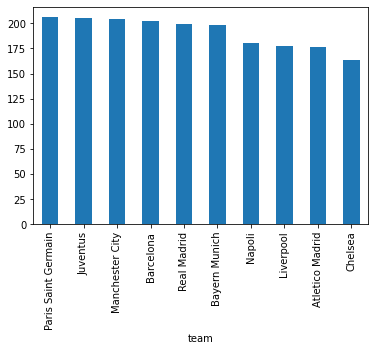

In [48]:
#Top 10 teams with the most wins
df['wins'].groupby(df['team']).sum().sort_values(ascending=False)[:10].plot(kind='bar')

In [49]:
#Which teams have the most losses
df['loses'].groupby(df['team']).sum().sort_values(ascending=False)

team
Udinese            136
Crystal Palace     132
Genoa              131
Cagliari           123
Sampdoria          121
                  ... 
Greuther Fuerth     16
Brentford           15
Venezia             14
Clermont Foot       12
Bochum              11
Name: loses, Length: 153, dtype: int64

In [50]:
#Which teams have the most draws
df['draws'].groupby(df['team']).sum().sort_values(ascending=False)

team
Torino                   94
Sassuolo                 88
Fiorentina               87
Athletic Club            86
Valencia                 85
                         ..
Brentford                 6
Bochum                    5
Greuther Fuerth           5
Evian Thonon Gaillard     4
Cardiff                   4
Name: draws, Length: 153, dtype: int64

In [51]:
df.columns

Index(['Unnamed: 0', 'league', 'season', 'position', 'team', 'matches', 'wins',
       'draws', 'loses', 'scored', 'missed', 'pts', 'xG', 'xG_diff', 'npxG',
       'xGA', 'xGA_diff', 'npxGA', 'npxGD', 'ppda_team', 'ppda_opponent',
       'deep', 'deep_allowed', 'xpts', 'xpts_diff'],
      dtype='object')

In [52]:
df.describe()

,Unnamed: 0,season,position,matches,wins,draws,loses,scored,missed,pts,...,xGA,xGA_diff,npxGA,npxGD,ppda_team,ppda_opponent,deep,deep_allowed,xpts,xpts_diff
count,784.00,784.00,784.00,784.00,784.00,784.00,784.00,784.00,784.00,784.00,...,784.00,784.00,784.00,784.00,784.00,784.00,784.00,784.00,784.00,784.00
mean,391.50,"2,017.50",10.32,35.55,13.29,8.96,13.29,48.83,48.83,48.84,...,47.82,-1.00,43.58,-0.00,11.32,11.31,208.02,208.02,49.10,0.26
std,226.47,2.29,5.68,4.31,6.00,2.99,5.55,17.42,13.65,17.39,...,11.47,6.51,10.61,19.60,2.68,3.50,85.41,56.76,14.18,7.02
min,0.00,"2,014.00",1.00,23.00,1.00,1.00,1.00,15.00,17.00,13.00,...,18.77,-29.18,18.01,-42.21,5.68,4.39,55.00,83.00,17.06,-24.72
25%,195.75,"2,015.75",5.00,34.00,9.00,7.00,9.00,36.00,39.00,37.00,...,39.67,-5.23,36.19,-13.81,9.32,9.01,150.00,168.00,39.33,-4.32
50%,391.50,"2,017.50",10.00,38.00,12.00,9.00,13.00,46.00,49.00,45.00,...,48.02,-1.13,43.51,-3.17,10.93,10.60,188.00,204.00,46.77,0.22
75%,587.25,"2,019.25",15.00,38.00,16.00,11.00,17.00,57.00,58.00,59.25,...,55.27,3.38,50.40,10.59,12.98,12.69,241.25,249.00,57.05,4.83
max,783.00,"2,021.00",20.00,38.00,32.00,18.00,29.00,118.00,94.00,100.00,...,91.97,16.37,82.08,73.05,21.90,30.47,582.00,375.00,94.38,23.05


In [53]:
df.corr()

,Unnamed: 0,season,position,matches,wins,draws,loses,scored,missed,pts,...,xGA,xGA_diff,npxGA,npxGD,ppda_team,ppda_opponent,deep,deep_allowed,xpts,xpts_diff
Unnamed: 0,1.00,0.20,0.02,-0.19,-0.08,-0.04,-0.04,-0.07,-0.04,-0.09,...,-0.09,-0.07,-0.12,-0.02,0.21,0.14,-0.17,-0.21,-0.10,0.02
season,0.20,1.00,-0.00,-0.56,-0.16,-0.18,-0.17,-0.14,-0.18,-0.19,...,-0.15,0.10,-0.17,-0.00,0.35,0.27,-0.08,-0.13,-0.23,0.02
position,0.02,-0.00,1.00,0.02,-0.88,0.19,0.86,-0.75,0.72,-0.87,...,0.65,-0.36,0.65,-0.83,0.45,-0.60,-0.63,0.57,-0.76,0.62
matches,-0.19,-0.56,0.02,1.00,0.28,0.31,0.30,0.30,0.38,0.35,...,0.44,-0.03,0.42,0.00,-0.15,-0.11,0.27,0.40,0.42,-0.01
wins,-0.08,-0.16,-0.88,0.28,1.00,-0.28,-0.71,0.89,-0.57,0.99,...,-0.50,0.31,-0.51,0.85,-0.46,0.62,0.76,-0.44,0.90,-0.63
draws,-0.04,-0.18,0.19,0.31,-0.28,1.00,0.01,-0.19,0.11,-0.12,...,0.16,0.05,0.16,-0.20,0.01,-0.30,-0.18,0.20,-0.04,0.21
loses,-0.04,-0.17,0.86,0.30,-0.71,0.01,1.00,-0.63,0.85,-0.73,...,0.80,-0.38,0.79,-0.81,0.37,-0.59,-0.52,0.68,-0.62,0.56
scored,-0.07,-0.14,-0.75,0.30,0.89,-0.19,-0.63,1.00,-0.35,0.89,...,-0.35,0.12,-0.35,0.82,-0.45,0.61,0.82,-0.33,0.87,-0.44
missed,-0.04,-0.18,0.72,0.38,-0.57,0.11,0.85,-0.35,1.00,-0.57,...,0.88,-0.55,0.87,-0.70,0.30,-0.49,-0.33,0.71,-0.47,0.45
pts,-0.09,-0.19,-0.87,0.35,0.99,-0.12,-0.73,0.89,-0.57,1.00,...,-0.49,0.33,-0.50,0.85,-0.47,0.59,0.76,-0.42,0.92,-0.62


In [54]:
#Season data for 2015-2016
df[df.season == 2015]

,Unnamed: 0,league,season,position,team,matches,wins,draws,loses,scored,...,xGA,xGA_diff,npxGA,npxGD,ppda_team,ppda_opponent,deep,deep_allowed,xpts,xpts_diff
20,20,La_liga,2015,1,Barcelona,38,29,4,5,112,...,34.03,5.03,33.29,66.19,6.01,15.06,570,163,94.38,3.38
21,21,La_liga,2015,2,Real Madrid,38,28,6,4,110,...,45.23,11.23,42.26,41.50,9.25,14.57,404,211,79.09,-10.91
22,22,La_liga,2015,3,Atletico Madrid,38,28,4,6,63,...,27.80,9.80,27.05,26.39,8.83,9.05,261,170,72.28,-15.72
23,23,La_liga,2015,4,Villarreal,38,18,10,10,44,...,41.63,6.63,39.40,-1.14,9.92,9.03,188,215,52.11,-11.89
24,24,La_liga,2015,5,Athletic Club,38,18,8,12,58,...,45.33,0.33,40.12,9.92,8.11,9.67,221,174,58.24,-3.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
659,659,Ligue_1,2015,16,Guingamp,38,11,11,16,47,...,46.27,-9.73,40.95,-2.64,13.53,8.00,157,208,48.87,4.87
660,660,Ligue_1,2015,17,Toulouse,38,9,13,16,45,...,39.80,-15.20,38.14,6.11,9.75,7.58,190,172,59.16,19.16
661,661,Ligue_1,2015,18,Reims,38,10,9,19,44,...,52.92,-4.08,50.64,-10.06,10.56,9.84,141,170,46.13,7.13
662,662,Ligue_1,2015,19,GFC Ajaccio,38,8,13,17,37,...,45.26,-12.74,41.46,-11.98,10.82,10.48,171,145,41.96,4.96


In [55]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [56]:
type(df)

pandas.core.frame.DataFrame

In [57]:
df[feature_cols].head()

,matches,wins,draws,loses,scored,missed,xG,xG_diff,npxG,xGA,xGA_diff,npxGA,npxGD,ppda_team,ppda_opponent,deep,deep_allowed
0,38,30,4,4,110,21,102.98,-7.02,97.78,28.44,7.44,24.73,73.05,5.68,16.37,489,114
1,38,30,2,6,118,38,95.77,-22.23,86.10,42.61,4.61,38.89,47.21,10.21,12.93,351,153
2,38,23,9,6,67,29,57.05,-9.95,52.59,29.07,0.07,26.84,25.75,8.98,9.24,197,123
3,38,22,11,5,70,32,55.06,-14.94,49.70,39.39,7.39,33.45,16.26,8.71,7.87,203,172
4,38,23,7,8,71,45,69.53,-1.47,62.09,47.86,2.86,41.92,20.18,8.28,9.48,305,168


In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

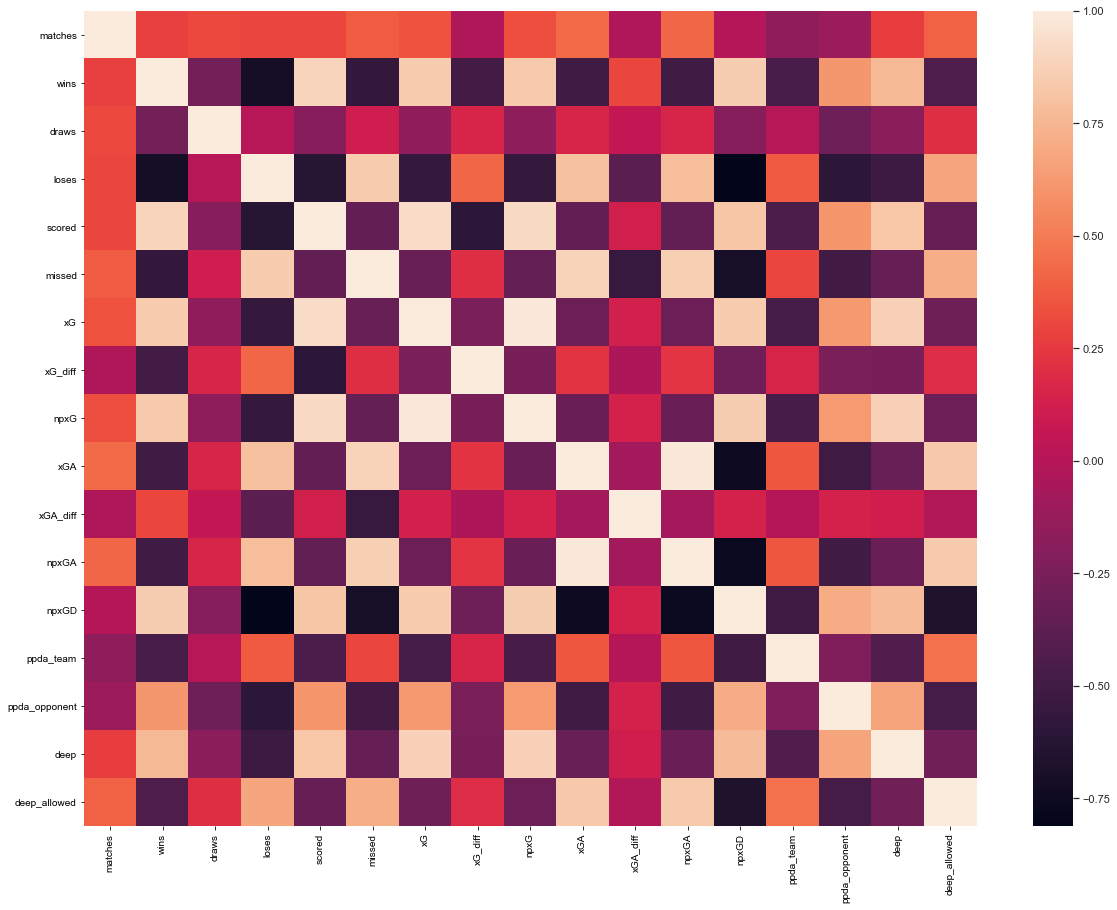

In [59]:
#Observing correlation between selected columns
plt.subplots(figsize=(20,15))
sns.set(font_scale=1.0)
sns.heatmap(df[feature_cols].corr())

<AxesSubplot:>

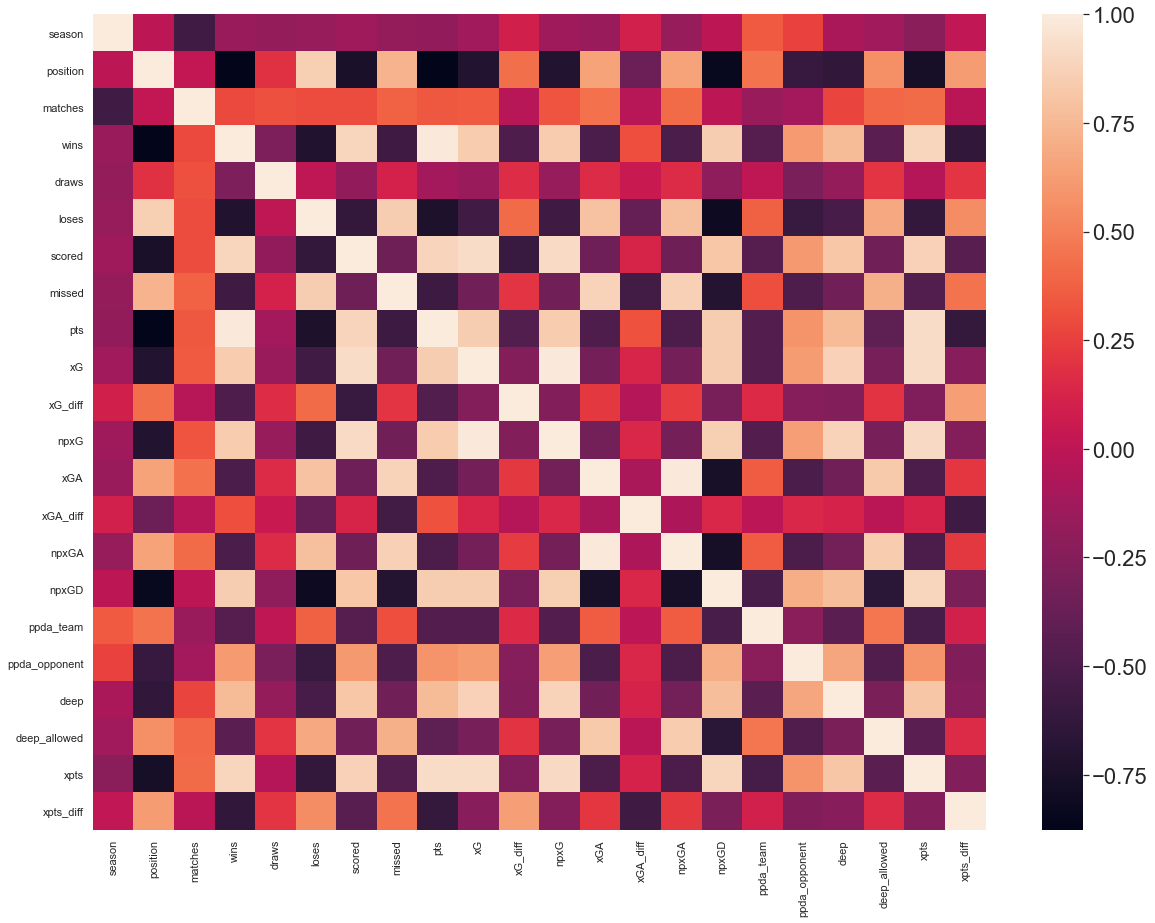

In [60]:
#Observing correlation between columns
plt.subplots(figsize=(20,15))
sns.set(font_scale=2.0)
sns.heatmap(df.corr())

In [61]:
sns.set(font_scale=1.0)

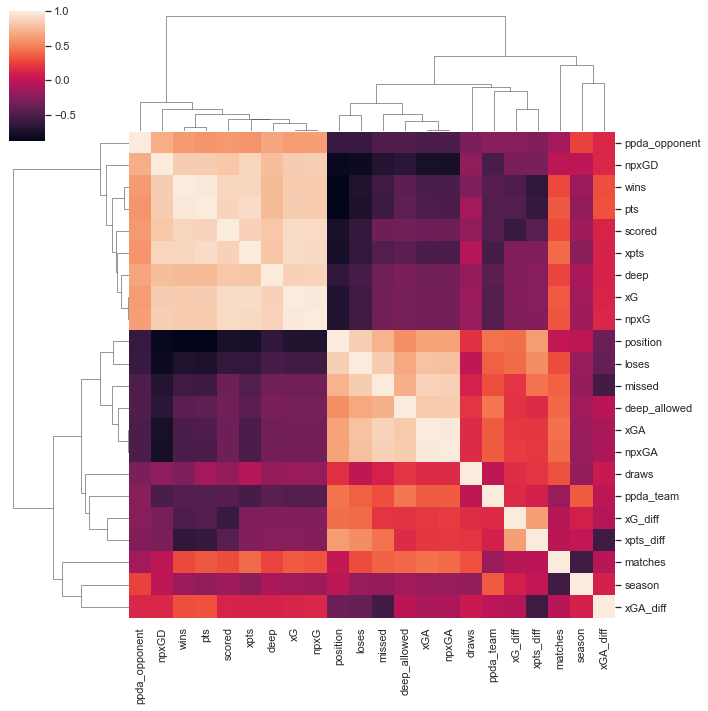

In [62]:
#Using a clustermap to group correlations
sns.clustermap(df.corr())

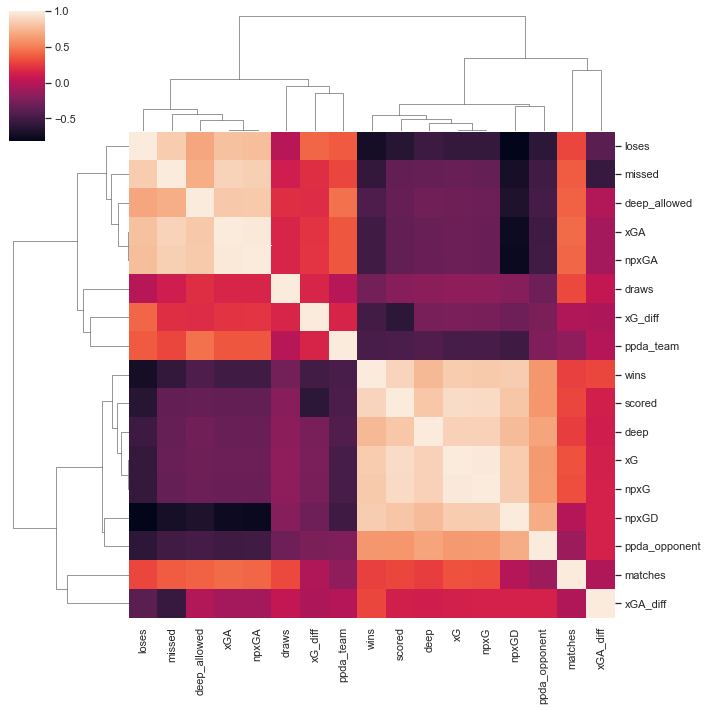

In [63]:
#Using a clustermap to group correlations on specific columns
sns.clustermap(df[feature_cols].corr())

C:\Users\tahah\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='xpts', ylabel='Density'>

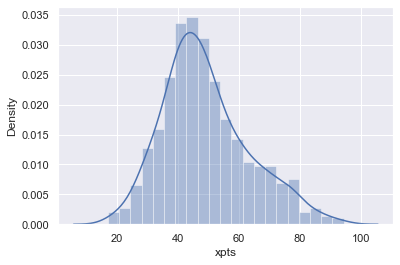

In [64]:
#Distribution of xpts
sns.distplot(df['xpts'])

C:\Users\tahah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='pts', ylabel='xpts'>

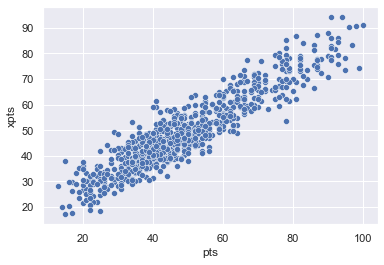

In [65]:
#Relation between expected and actual points obtained
sns.scatterplot(df['pts'], df['xpts'])

<AxesSubplot:ylabel='Frequency'>

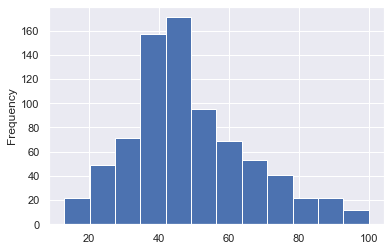

In [66]:
df['pts'].plot(kind='hist', bins=12)

In [67]:
df.team.value_counts()

Mainz 05               8
Chelsea                8
Barcelona              8
Wolfsburg              8
Marseille              8
                      ..
Queens Park Rangers    1
Brentford              1
Greuther Fuerth        1
Cordoba                1
Bochum                 1
Name: team, Length: 153, dtype: int64

## Model building

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [69]:
X = df[feature_cols]
y = df['xpts']

In [70]:
lm = LinearRegression()

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [72]:
lm.fit(X_train, y_train)

LinearRegression()

In [73]:
predictions = lm.predict(X_test)

In [74]:
predictions.transpose()

array([38.92038673, 66.26486506, 45.82783363, 50.25760379, 45.70690431,
       48.48713546, 70.11811099, 28.33353251, 48.86956988, 62.41271926,
       46.92772642, 57.62932436, 39.85616216, 36.19304611, 44.59782061,
       30.38322051, 46.21274373, 57.74252716, 40.18807726, 53.20821523,
       58.56263907, 32.76960169, 30.593923  , 47.92555969, 52.52239136,
       52.25372122, 70.56364467, 21.8179248 , 88.46835607, 37.47717258,
       41.03617518, 50.12472745, 45.05788151, 51.6423258 , 48.96361666,
       30.71552926, 80.85630665, 37.52983579, 33.55869093, 50.80046392,
       47.12766212, 21.02007092, 36.27717045, 49.22335556, 75.98143136,
       30.25280571, 34.58579787, 55.61022972, 45.88904751, 53.40507053,
       34.28303796, 38.31951178, 50.51014424, 38.96631647, 51.68386186,
       58.56939688, 50.05422783, 52.48673714, 70.54052782, 35.99051842,
       57.09474603, 45.06554738, 49.14966763, 53.62132517, 39.38904354,
       66.09913731, 38.51606778, 43.62673557, 39.73108405, 69.78

In [75]:
y_test

598   39.52
590   65.20
209   46.04
637   49.13
174   45.63
       ... 
79    35.83
148   31.89
335   36.11
247   55.54
559   36.78
Name: xpts, Length: 157, dtype: float64

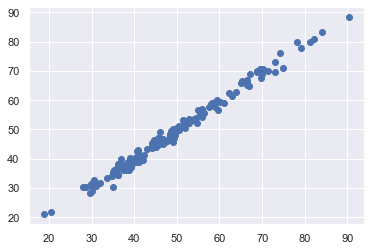

In [76]:
plt.scatter(y_test, predictions)

In [77]:
df.shape

(784, 24)

In [84]:
import sklearn.metrics
sklearn.metrics.r2_score(y_test, predictions)

0.9893535844531981